In [7]:
import pandas as pd
import os

# Definimos las rutas subiendo un nivel (..) y entrando a 'data'
# Ajusta 'data' si tu carpeta tiene otro nombre (ej. 'datasets')
PATH_VENTAS = '../data/vgsales.csv'
PATH_METACRITIC = '../data/games.csv'

# Verificación rápida de que los archivos existen en esa ruta
for path in [PATH_VENTAS, PATH_METACRITIC]:
    if os.path.exists(path):
        print(f"✅ Archivo encontrado: {path}")
    else:
        print(f"❌ No se encuentra en: {path}")

# Carga de DataFrames
df_ventas = pd.read_csv(PATH_VENTAS)
df_criticas = pd.read_csv(PATH_METACRITIC)

# Estandarización de plataformas para el merge
mapeo = {
    'Xbox 360': 'X360', 'PlayStation 3': 'PS3', 'PlayStation 4': 'PS4',
    'PlayStation 2': 'PS2', 'PC': 'PC', 'Switch': 'NS',
    'Xbox One': 'XOne', 'Wii U': 'WiiU', 'Nintendo DS': 'DS'
}
df_criticas['Platform_Std'] = df_criticas['platforms'].replace(mapeo)

# Merge de los datos
df_final = pd.merge(
    df_ventas, 
    df_criticas, 
    left_on=['Name', 'Platform'], 
    right_on=['title', 'Platform_Std']
)

print(f"\nÉxito: Datos combinados. Filas resultantes: {len(df_final)}")

✅ Archivo encontrado: ../data/vgsales.csv
✅ Archivo encontrado: ../data/games.csv

Éxito: Datos combinados. Filas resultantes: 1766


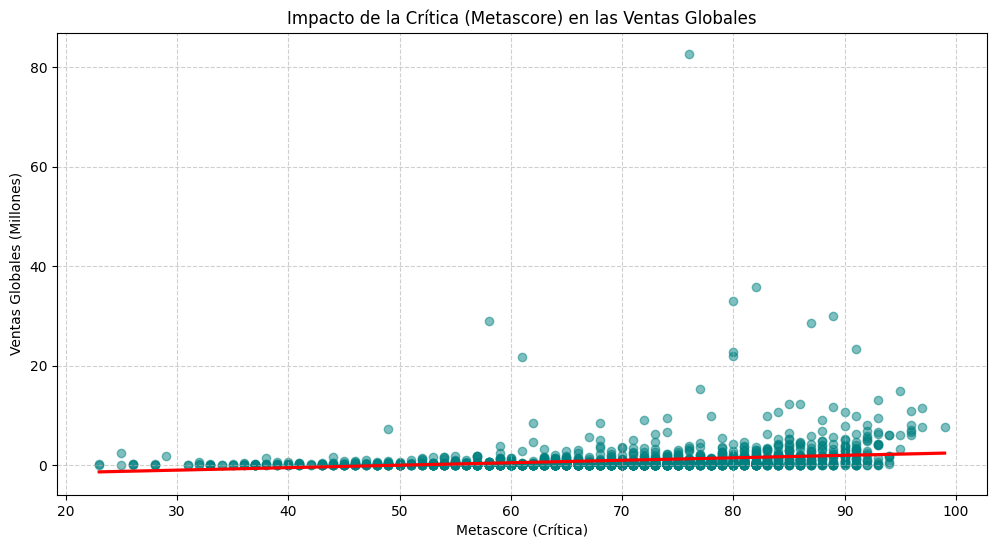

C:\Users\danma\AppData\Local\Temp\ipykernel_14508\215745696.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='Name', y='Global_Sales', ax=ax1, palette='viridis')


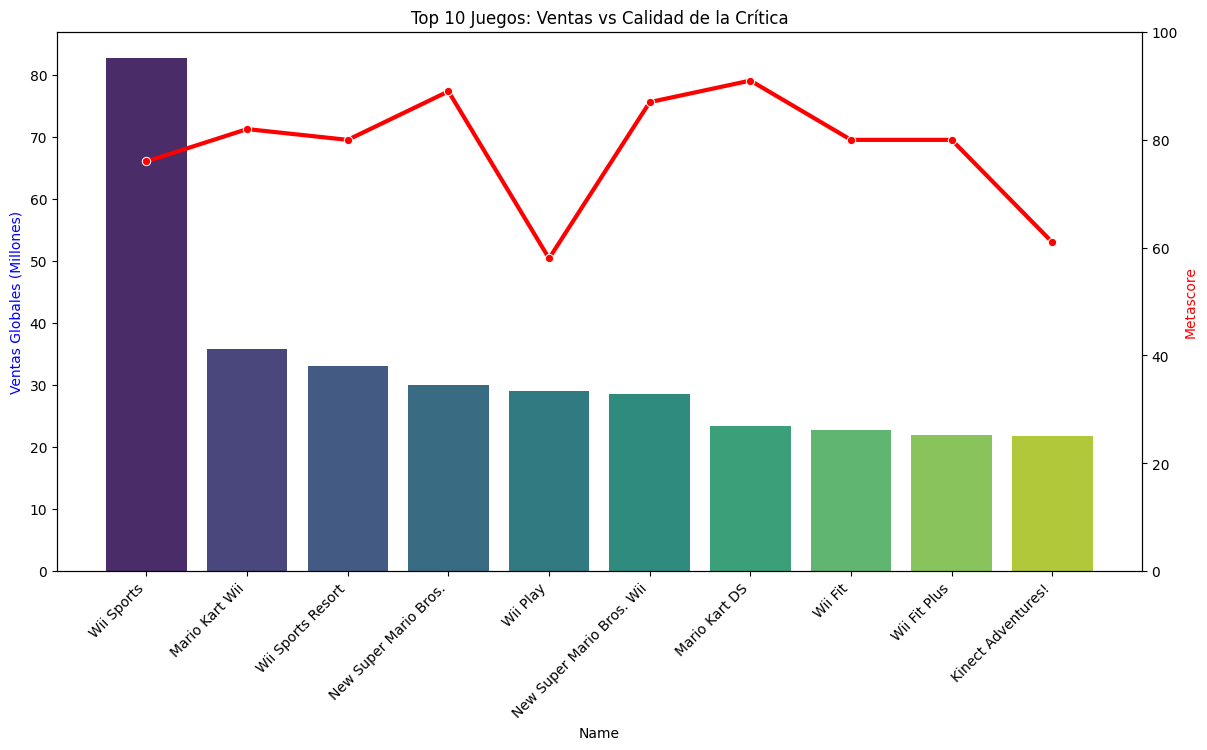

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar los archivos desde la carpeta data
# (Ajustado para que funcione desde tu carpeta 'pruebas_2')
df_vgsales = pd.read_csv('../data/vgsales.csv')
df_games = pd.read_csv('../data/games.csv')

# 2. Normalizar nombres de plataformas
# games.csv usa nombres largos, vgsales usa siglas.
mapa_plataformas = {
    'Xbox 360': 'X360', 'PlayStation 3': 'PS3', 'PlayStation 4': 'PS4',
    'PlayStation 2': 'PS2', 'PC': 'PC', 'Switch': 'NS',
    'Xbox One': 'XOne', 'Wii U': 'WiiU', 'Nintendo 64': 'N64',
    'Nintendo DS': 'DS', 'PlayStation': 'PS'
}
df_games['Platform_Fixed'] = df_games['platforms'].replace(mapa_plataformas)

# 3. Cruzar los datos (Merge)
df_merged = pd.merge(
    df_vgsales, 
    df_games, 
    left_on=['Name', 'Platform'], 
    right_on=['title', 'Platform_Fixed']
)

# 4. Limpieza de datos
# Convertir userscore a numérico (maneja los 'tbd' como NaN)
df_merged['userscore'] = pd.to_numeric(df_merged['userscore'], errors='coerce')
df_merged = df_merged.dropna(subset=['metascore', 'Global_Sales'])

# --- VISUALIZACIÓN 1: Relación entre Metascore y Ventas Globales ---
plt.figure(figsize=(12, 6))
sns.regplot(data=df_merged, x='metascore', y='Global_Sales', 
            scatter_kws={'alpha':0.5, 'color':'teal'}, line_kws={'color':'red'})
plt.title('Impacto de la Crítica (Metascore) en las Ventas Globales')
plt.xlabel('Metascore (Crítica)')
plt.ylabel('Ventas Globales (Millones)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# --- VISUALIZACIÓN 2: Top 10 Juegos por Ventas y su Calidad ---
top_10 = df_merged.nlargest(10, 'Global_Sales')
fig, ax1 = plt.subplots(figsize=(14, 7))

# Barras para Ventas
sns.barplot(data=top_10, x='Name', y='Global_Sales', ax=ax1, palette='viridis')
ax1.set_ylabel('Ventas Globales (Millones)', color='b')
plt.xticks(rotation=45, ha='right')

# Línea para Metascore (Eje secundario)
ax2 = ax1.twinx()
sns.lineplot(data=top_10, x='Name', y='metascore', ax=ax2, color='red', marker='o', linewidth=3)
ax2.set_ylabel('Metascore', color='r')
ax2.set_ylim(0, 100)

plt.title('Top 10 Juegos: Ventas vs Calidad de la Crítica')
plt.show()

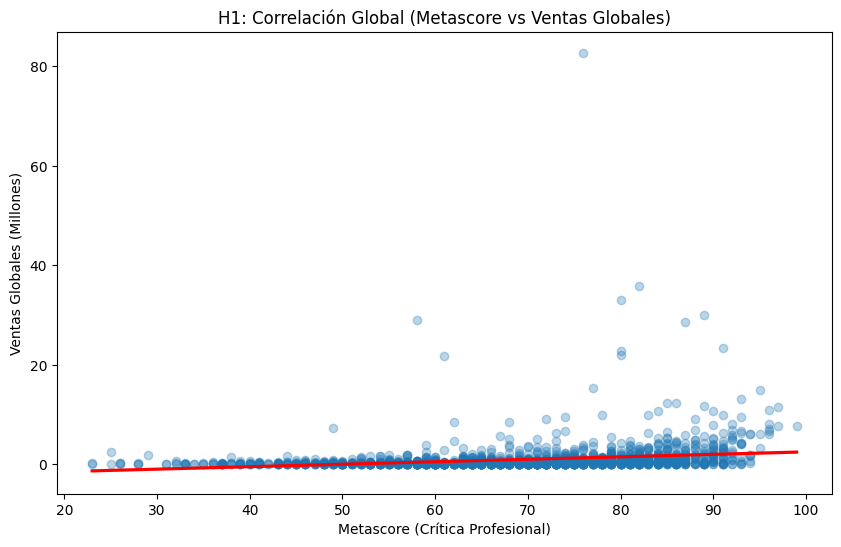

In [10]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df_merged, x='metascore', y='Global_Sales', 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('H1: Correlación Global (Metascore vs Ventas Globales)')
plt.xlabel('Metascore (Crítica Profesional)')
plt.ylabel('Ventas Globales (Millones)')
plt.show()

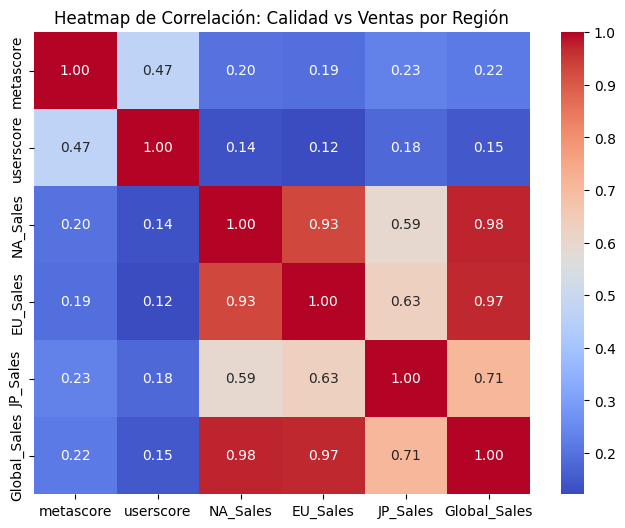

In [11]:
cols_corr = ['metascore', 'userscore', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']
plt.figure(figsize=(8, 6))
sns.heatmap(df_merged[cols_corr].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap de Correlación: Calidad vs Ventas por Región')
plt.show()

C:\Users\danma\AppData\Local\Temp\ipykernel_14508\1553307148.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_merged[df_merged['Platform'].isin(top_platforms)], x='Platform', y='metascore', palette='Set3')


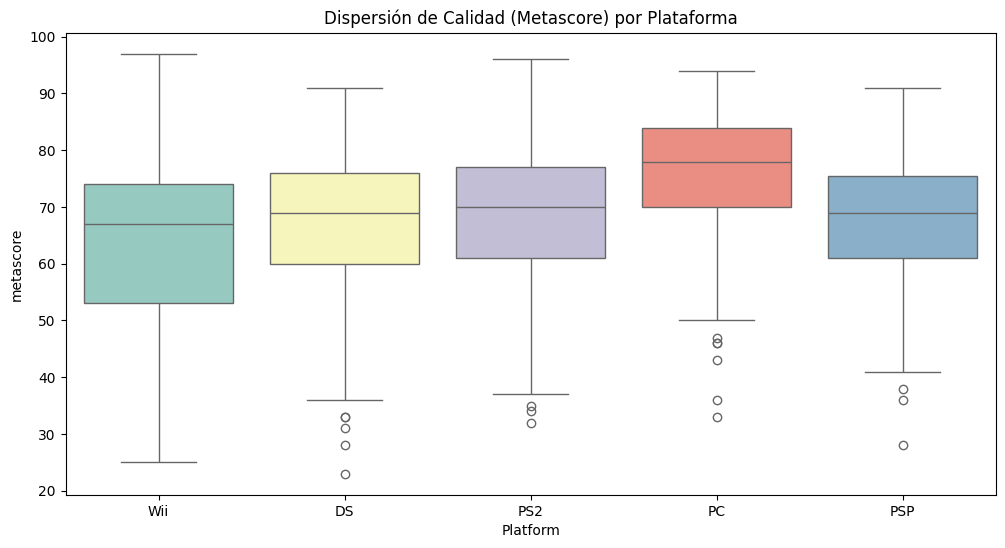

In [12]:
plt.figure(figsize=(12, 6))
top_platforms = df_merged['Platform'].value_counts().nlargest(5).index
sns.boxplot(data=df_merged[df_merged['Platform'].isin(top_platforms)], x='Platform', y='metascore', palette='Set3')
plt.title('Dispersión de Calidad (Metascore) por Plataforma')
plt.show()

C:\Users\danma\AppData\Local\Temp\ipykernel_14508\662351223.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=polemicos, x='diff_score', y='Name', palette='Reds_r')


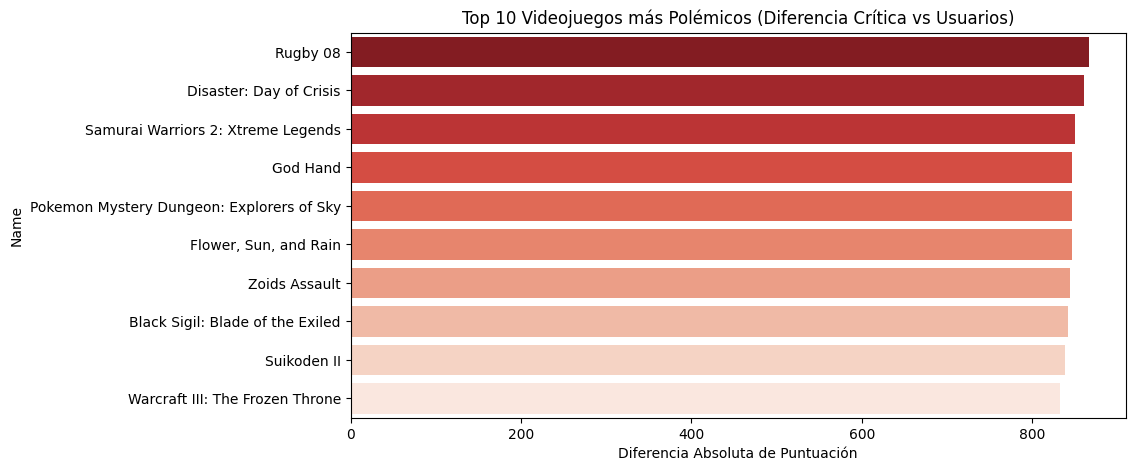

In [13]:
# Normalizamos userscore a escala 100 para comparar
df_merged['diff_score'] = abs(df_merged['metascore'] - (df_merged['userscore'] * 10))
polemicos = df_merged.nlargest(10, 'diff_score')

plt.figure(figsize=(10, 5))
sns.barplot(data=polemicos, x='diff_score', y='Name', palette='Reds_r')
plt.title('Top 10 Videojuegos más Polémicos (Diferencia Crítica vs Usuarios)')
plt.xlabel('Diferencia Absoluta de Puntuación')
plt.show()

In [14]:
# Comparativa de coeficientes de correlación
correlaciones = df_merged[['metascore', 'NA_Sales', 'EU_Sales', 'JP_Sales']].corr()['metascore'][1:]
print("Fuerza de la crítica profesional por región:")
print(correlaciones)

Fuerza de la crítica profesional por región:
NA_Sales    0.200454
EU_Sales    0.191867
JP_Sales    0.234472
Name: metascore, dtype: float64


<Figure size 1200x800 with 0 Axes>

C:\Users\danma\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\danma\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


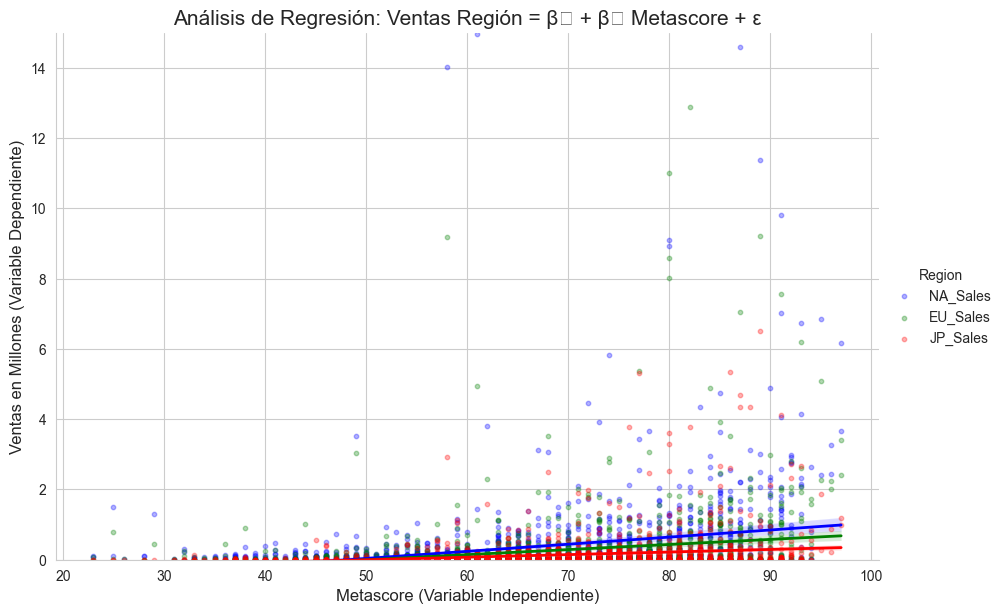

--- Validación Estadística (Coeficiente r) ---
NA_Sales: r = 0.179 (Débil)
EU_Sales: r = 0.181 (Débil)
JP_Sales: r = 0.211 (Débil)


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# 1. Preparación de datos (formato "long" para Seaborn)
# Creamos un subset con las columnas necesarias
df_regresion = df_final[['metascore', 'NA_Sales', 'EU_Sales', 'JP_Sales']].copy()

# Transformamos la tabla para tener una columna de 'Region' y otra de 'Ventas'
df_plot = df_regresion.melt(id_vars=['metascore'], 
                            value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales'],
                            var_name='Region', value_name='Ventas')

# 2. Creación del Diagrama de Dispersión Segmentado
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Dibujamos las regresiones para cada región
scatter_plot = sns.lmplot(
    data=df_plot, x='metascore', y='Ventas', hue='Region',
    palette={'NA_Sales': 'blue', 'EU_Sales': 'green', 'JP_Sales': 'red'},
    scatter_kws={'alpha': 0.3, 's': 10}, 
    line_kws={'linewidth': 2},
    aspect=1.5, height=6
)

# 3. Personalización según la Metodología
plt.title('Análisis de Regresión: Ventas Región = β₀ + β₁ Metascore + ε', fontsize=15)
plt.xlabel('Metascore (Variable Independiente)', fontsize=12)
plt.ylabel('Ventas en Millones (Variable Dependiente)', fontsize=12)
plt.ylim(0, 15) # Limitamos el eje Y para ver mejor las pendientes sin los outliers extremos (como Wii Sports)

plt.show()

# 4. Cálculo de Coeficientes de Pearson (r) para la validación
print("--- Validación Estadística (Coeficiente r) ---")
for reg in ['NA_Sales', 'EU_Sales', 'JP_Sales']:
    r, p = stats.pearsonr(df_regresion['metascore'], df_regresion[reg])
    interpretacion = "Fuerte" if abs(r) > 0.7 else "Moderada" if abs(r) > 0.4 else "Débil"
    print(f"{reg}: r = {r:.3f} ({interpretacion})")